In [77]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv("filtered_data_with_bidask.csv");


In [108]:
import statistics
df['Date'] = pd.to_datetime(df['Date'])

In [106]:
tickers = list(df.columns.values);
def unit(ticker, warrantFrac):
    idx = tickers.index(ticker)
    
    commonAsk = df[tickers[idx] + ".1"]
    commonBid = df[tickers[idx] + ".2"]
    
    warrantAsk = df[tickers[idx + 3] + ".1"]
    warrantBid = df[tickers[idx + 3] + ".2"]

    unitAsk = df[tickers[idx + 6] + ".1"]
    unitBid = df[tickers[idx + 6] + ".2"]
    
    dates = []
    profit = []
    totalProfit = [];
    totalInvestment = 0;
    for row in range(commonAsk.shape[0]):
        #buy and split units
        unitPrice = unitAsk[row] 
        
        commonPrice = commonBid[row]
        warrantPrice = warrantBid[row]
        
        if (commonPrice > 0 and warrantPrice > 0 and unitPrice > 0):
            if (warrantPrice * warrantFrac + commonPrice > unitPrice + 0.05):
                dates.append(df["Date"][row])
                profit.append(warrantPrice * warrantFrac + commonPrice - unitPrice)
                totalProfit.append(sum(profit))
                totalInvestment += unitPrice
                
    plt.plot(dates, totalProfit)
    print ("avg profit: " + str(sum(profit) / len(profit)))
    print ("num trades: " + str(len(profit)))
    print(totalInvestment)
    print(totalProfit[len(totalProfit) - 1])

avg profit: 0.1093812500000001
num trades: 16
210.86
1.7501000000000015


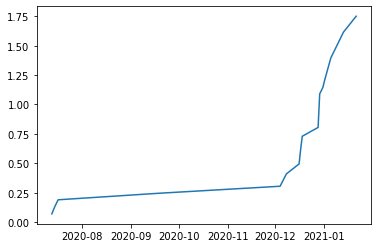

In [107]:
unit("ASTS", 0.5)